# Информация

После запуска в 2008 году Spotify навсегда изменил то, как люди слушают музыку.
Являясь крупнейшим стриминговым сервисом в мире, Spotify позволяет находить, упорядочивать и делиться более 100 млн песен, 5 млн подкастов и 350 тыс аудиокниг.
На данный момент аудитория сервиса насчитывает 574 млн пользователей, среди которых 226 млн используют платную подписку в 184 регионах.

# Цель Иследования

В данной работе будет исследован список самых популярных и прослушиваемых песен сервиса. Мы будем использовать исследовательский подход к анализу данных для выявления факторов влияющих на популярность песен, а также интересных трендов и зависимостей.

# Описание Данных

Используемый датасет содержит список из 953 самых прослушиваемых песен сервиса, каждая из которых имеет следующие характеристики:

* track_name: Название песни
* artist(s)_name: Имя исполнителя(исполнителей) песни
* artist_count: Количество исполнителей, учатвовавших в создании песни
* released_year: Год, когда была выпущена песня
* released_month: Месяц, когда была выпущена песня
* released_day: День месаца, когда была выпущеа песя
* in_spotify_playlists: Количество плейлистов Spotify, в которые включена песня
* in_spotify_charts: Присутствие и ранг песни в чартах Spotify
* streams: Количество прослушиваний в Spotify
* in_apple_playlists: Количество плейлистов Apple Music, в которые включена песня
* in_apple_charts: Присутствие и ранг песни в чартах Apple Music
* in_deezer_playlists: Количество плейлистов Deezer, в которые включена песня
* in_deezer_charts: Присутствие и ранг песни в чартах Apple Music
* in_shazam_charts: Присутствие и ранг песни в чартах Shazam
* bpm: Ударов в минуту, показатель, определяющий скорость исполнения песни
* key: Ключ(Тональность песни. Например До-Мажор)
* mode: Лад(Мажор/Минор)
* danceability_%: Процент, указывающий, насколько песня подходит для танцев на основе комбинации музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Чем ближе к 100, тем "танцевальнее" песня
* valence_%: Процент, указывающий "позитивность" содержания песни. Чем ближе к 100, тем позитивнее, жизнерадостнее песня.
* energy_%: Процент, указывающий уровень перцептивной интенсивности и активности песни. Чем ближе к 100, тем песня кажется быстрее, громче, шумнее.
* acousticness_%: Процент, указывающий количество акустического звука в песне. Чем ближе к 100, тем более акустическая песня(больше живых инструментов)
* instrumentalness_%: Процент, указывающий количество живого вокала в песне. Чем ближе к 100, тем вероятнее, что песня инструментальная(больше живого вокала, меньше инструментов) 
* liveness_%: Процент, указывающий вероятность, что песня была записана с живой публикой(live). Чем ближе к 100, тем вероятнее, что песня была записана на живом выступлении
* speechiness_%: Процент, указывающий присутствие произнесенных слов в треке. Если speachiness песни выше 66, она, вероятно, состоит из устных слов, оценка от 33 до 66 — это песня, которая может содержать как музыку, так и слова, а оценка ниже 33 означает, что в песне нет речи


# Библиотеки

In [10]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud
import plotly.express as px
from plotly.offline import iplot
import string

%matplotlib inline

# Предварительный анализ

In [11]:
df = pd.read_csv('Popular_Spotify_Songs_Redacted_utf8.csv', encoding='utf8')
print(f"Песни(строки): {df.shape[0]} , Характеристики(столбцы): {df.shape[1]}")

Песни(строки): 953 , Характеристики(столбцы): 24


### Обзор сырых данных

In [12]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Проверка пустых значений

In [13]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Проверка на дубликаты

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Анализ типов данных столбцов показывает, что **streams**, **in_deezer_playlists**, **in_shazam_charts** автоматически получили неверные типы, поскольку выглядят они как столбцы с численным типом данных, однако получили строковый.

In [16]:
def is_number(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

print(df.streams[~df.streams.apply(is_number)])

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [17]:
df.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

574ый элемент имеет некорректное значение streams. Заменим его средним значением.

In [18]:
print(df.in_deezer_playlists[~df.in_deezer_playlists.apply(is_number)])

48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object


Выявленные значения используют запятую в качестве разделителя для тысяч. Исправим это функцией

In [19]:
print(df.in_shazam_charts[~df.in_shazam_charts.apply(is_number)])

12    1,021
13    1,281
17    1,173
24    1,093
44    1,133
88    1,451
89    1,170
Name: in_shazam_charts, dtype: object


Аналогичная проблема с разделителем запятой.

## Исправление выявленных артефактов

In [20]:
df.streams = df.streams.apply(lambda val: int(val) if is_number(val) else np.nan)
df.streams = df.streams.fillna(df.streams.mean()).astype(np.int64)
df.in_deezer_playlists = df.in_deezer_playlists.apply(
    lambda val: np.int64(val.replace(',', '')) if isinstance(val, str) else np.nan
)
df.in_shazam_charts = df.in_shazam_charts.apply(
    lambda val: np.int64(val.replace(',','')) if isinstance(val, str) else np.nan
)

In [21]:
df.iloc[574]

track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                              1
released_year                                          1970
released_month                                            1
released_day                                              1
in_spotify_playlists                                   2877
in_spotify_charts                                         0
streams                                           514137424
in_apple_playlists                                       16
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                        0.0
bpm                                                     110
key                                                       A
mode                                    

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    int64  
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

# Обзор Данных

In [42]:
df_description = pd.DataFrame({
    'Type': df.dtypes,
    'Qualitative/Quantitative': ['Qualitative' if dtype==object or col.find('released')>=0 else 'Quantitative' for col, dtype in zip(df.columns, df.dtypes)],
    'Uniques': [len(df[col].unique()) if dtype==object else '-' for col, dtype in zip(df.columns, df.dtypes)],
    'Min': [df[col].min() if dtype==np.int64 else '-' for col, dtype in zip(df.columns, df.dtypes)],
    'Max': [df[col].max() if dtype==np.int64 else '-' for col, dtype in zip(df.columns, df.dtypes)],
    'Avg':  [df[col].mean() if dtype==np.int64 else '-' for col, dtype in zip(df.columns, df.dtypes)],
    'Std': [df[col].std() if dtype==np.int64 else '-' for col, dtype in zip(df.columns, df.dtypes)], 
    'Missing': [df[col].isnull().sum() for col in df.columns]
}).sort_values(by='Qualitative/Quantitative')

df_description

,Type,Qualitative/Quantitative,Uniques,Min,Max,Avg,Std,Missing
track_name,object,Qualitative,943,-,-,-,-,0
artist(s)_name,object,Qualitative,645,-,-,-,-,0
released_year,int64,Qualitative,-,1930,2023,2018.265477,11.095926,0
released_month,int64,Qualitative,-,1,12,6.033578,3.566435,0
released_day,int64,Qualitative,-,1,31,13.930745,9.201949,0
mode,object,Qualitative,2,-,-,-,-,0
key,object,Qualitative,12,-,-,-,-,95
instrumentalness_%,int64,Quantitative,-,0,91,1.581322,8.4098,0
acousticness_%,int64,Quantitative,-,0,97,27.057712,25.996077,0
energy_%,int64,Quantitative,-,9,97,64.279119,16.550526,0


Из данных выше следуют следующие выводы: алгоритмы Спотифая не дают стопроцентной вероятности при характеризации музыки, оставляя себе возможность ошибки в 3 процента, при этом их классификаторы способны выдавать 0 значение характеристики.

# Анализ данных

### Проверка корреляции данных

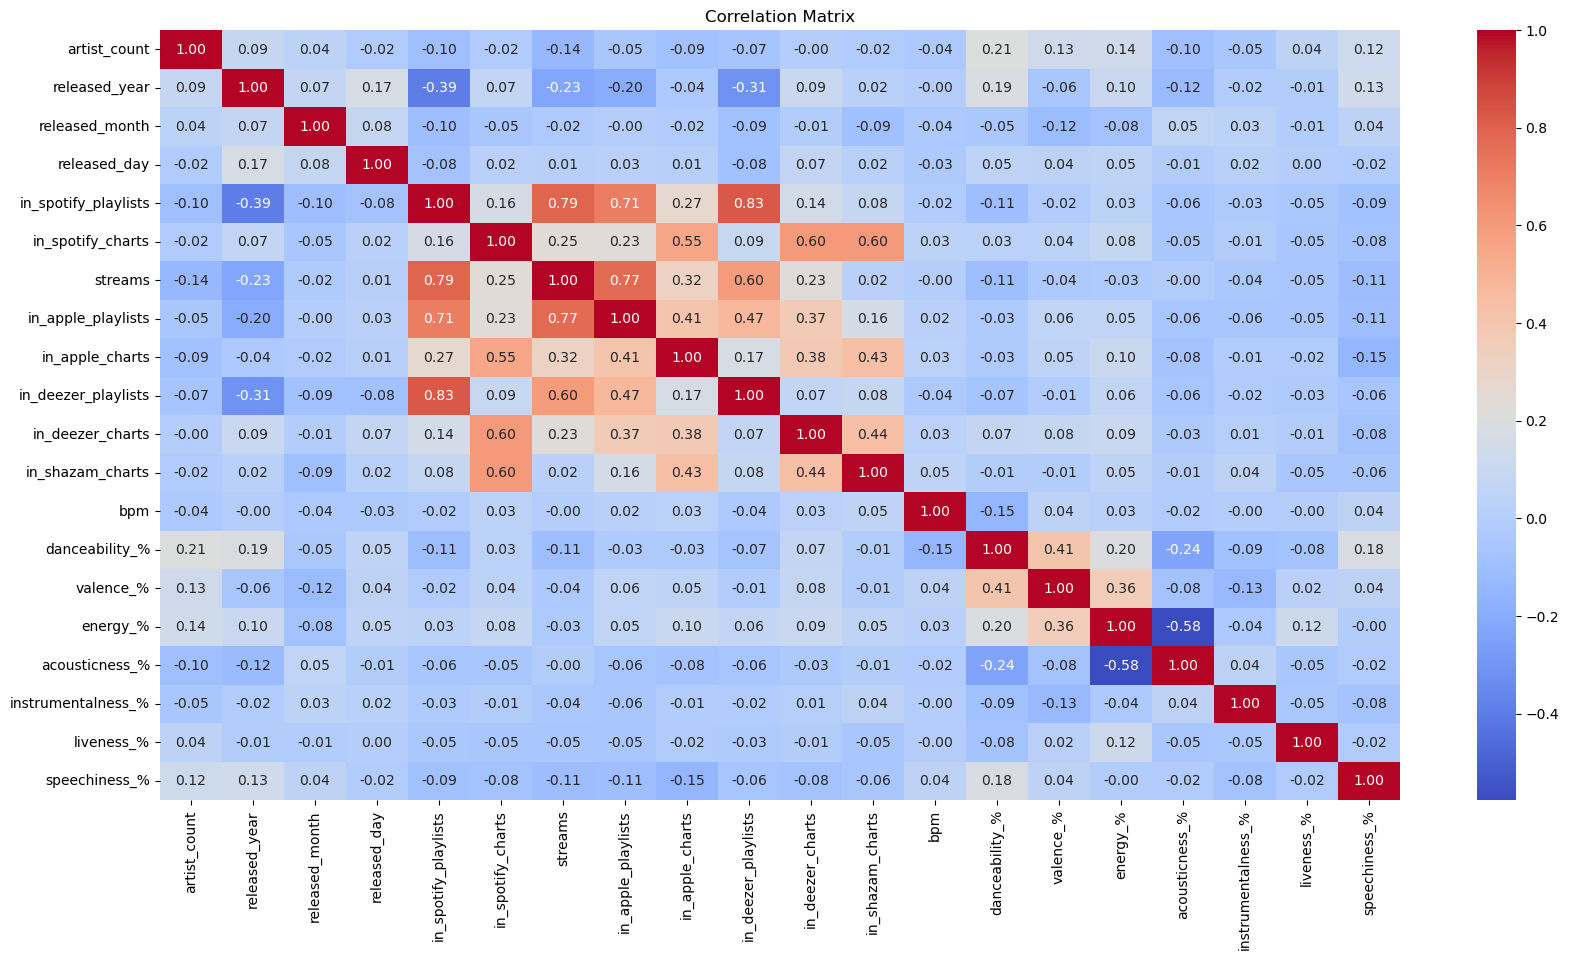

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Хоть корреляция и не означает зависимость, на данном графике можно обратить внимание на следующие интересные моменты:
* Отрицательная корреляция между энергичностью песни и ее акустичностью. То есть, как и ожидается, песни где только вокал менее энергичны.
* Если песня добавлена в плейлист Спотифай, значит скорее всего она есть в плейлисте на других сервисах. Также довольно ожидаемое явление.
* Если песня попала в чарт Спотифай, то скорее всего она есть в чартах других сервисов.
* Есть сильная зависимость между количеством прослушиваний на сервисе Спотифай и количеством добавлений в плейлист, что тоже является довольно ожидаемым.
* Более ранние песни оказываются в меньшем количестве плейлистов.

### Распределения по характеру 

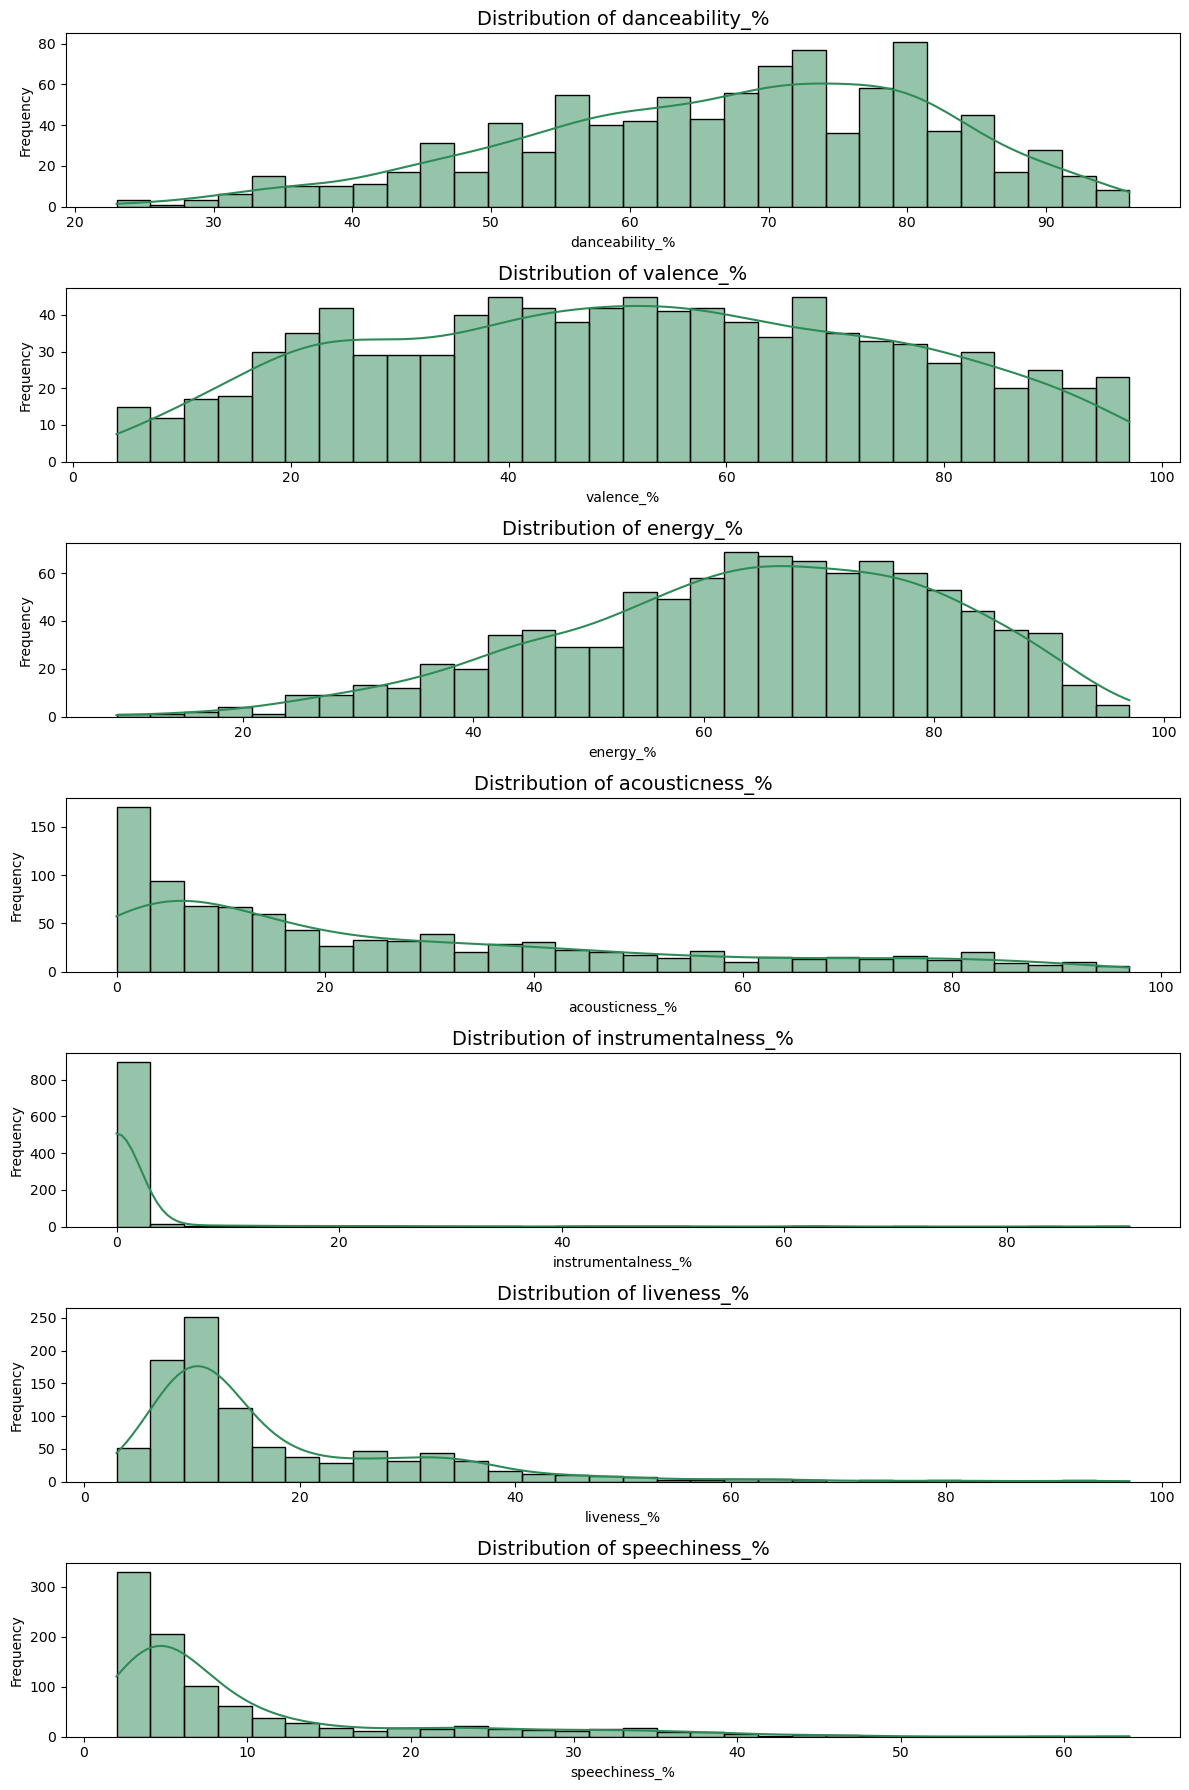

In [25]:
song_features = ['danceability_%', 'valence_%', 'energy_%',
'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(nrows=len(song_features), figsize=(12, 18))

for i, feature in enumerate(song_features):
    sns.histplot(df[feature], ax=axes[i], bins=30, kde=True, color = 'seagreen')
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

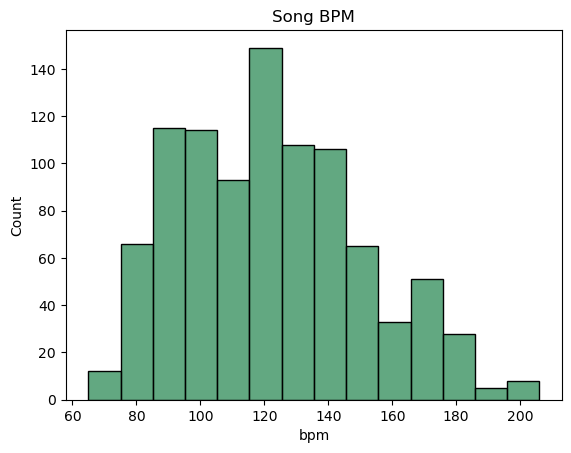

In [26]:
sns.histplot(data = df['bpm'], bins = 14, color = 'seagreen')
plt.title('Song BPM')
plt.show()

При помощи данных гистограмм можно охарактеризовать особенности среднего трека из топов: танцевальный и энергичный трек, летних-весенних оттенков, в среднем темпе (около 120 бпм), записанный в студии, электронные инструменты, минимум речетатива.

### Распределение по тональностям

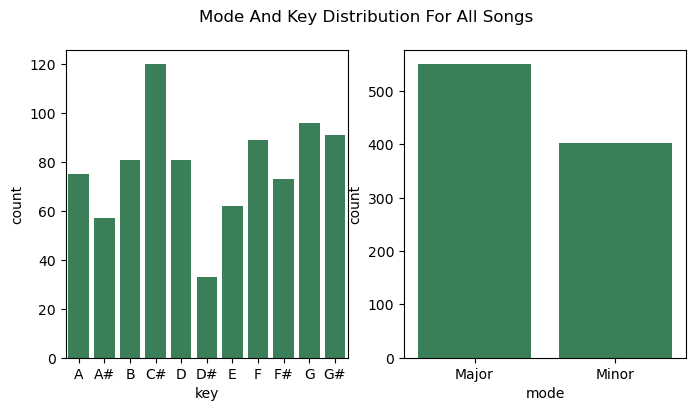

In [27]:
count_by_key = df['key'].value_counts().reset_index().sort_values(by = 'key')
count_by_mode = df['mode'].value_counts().reset_index()

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
fig.suptitle('Mode And Key Distribution For All Songs')
sns.barplot(data=count_by_key, x = 'key', y = 'count', color = 'seagreen', ax = axes[0])
sns.barplot(data=count_by_mode, x = 'mode', y = 'count', color = 'seagreen', ax = axes[1])
plt.show()

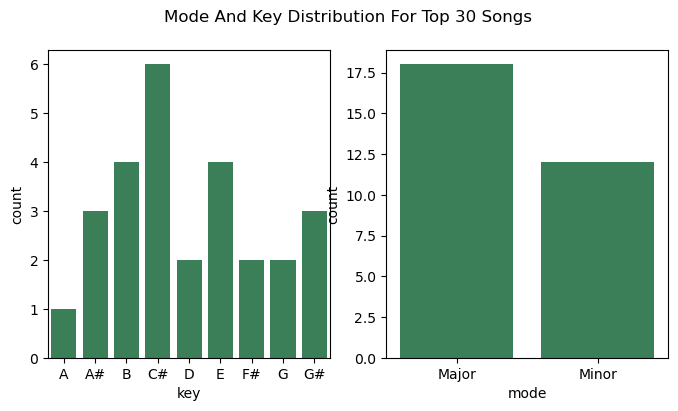

In [28]:
top_30songs = df.sort_values(by='streams', ascending=False)[:30]
top30_count_by_key = top_30songs['key'].value_counts().reset_index().sort_values(by = 'key')
top30_count_by_mode = top_30songs['mode'].value_counts().reset_index()

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
fig.suptitle('Mode And Key Distribution For Top 30 Songs')
sns.barplot(data=top30_count_by_key, x = 'key', y = 'count', color = 'seagreen', ax = axes[0])
sns.barplot(data=top30_count_by_mode, x = 'mode', y = 'count', color = 'seagreen', ax = axes[1])
plt.show()

Как видно из графиков в музыке превалирует мажорное звучание и тональность до диез

### Артисты с наибольшим количеством песен в топе

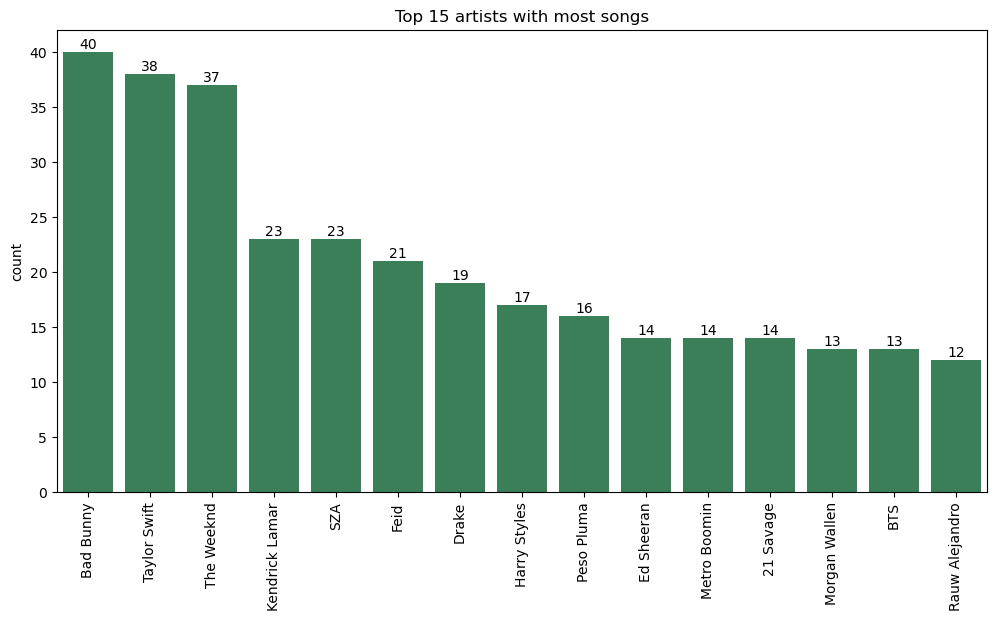

In [29]:
count_by_artist = pd.Series(','.join(df['artist(s)_name']).split(',')).str.strip().value_counts().head(25)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data = count_by_artist[:15], color = 'seagreen')
ax.bar_label(ax.containers[0])
plt.title('Top 15 artists with most songs')
plt.xticks(rotation='vertical')
plt.show()

Первые три места довольно ожидаемы. Что гораздо интереснее - разрыв между третим и четвертым на 14 значений, что чуть меньше трети от максимума.

### Топ артистов

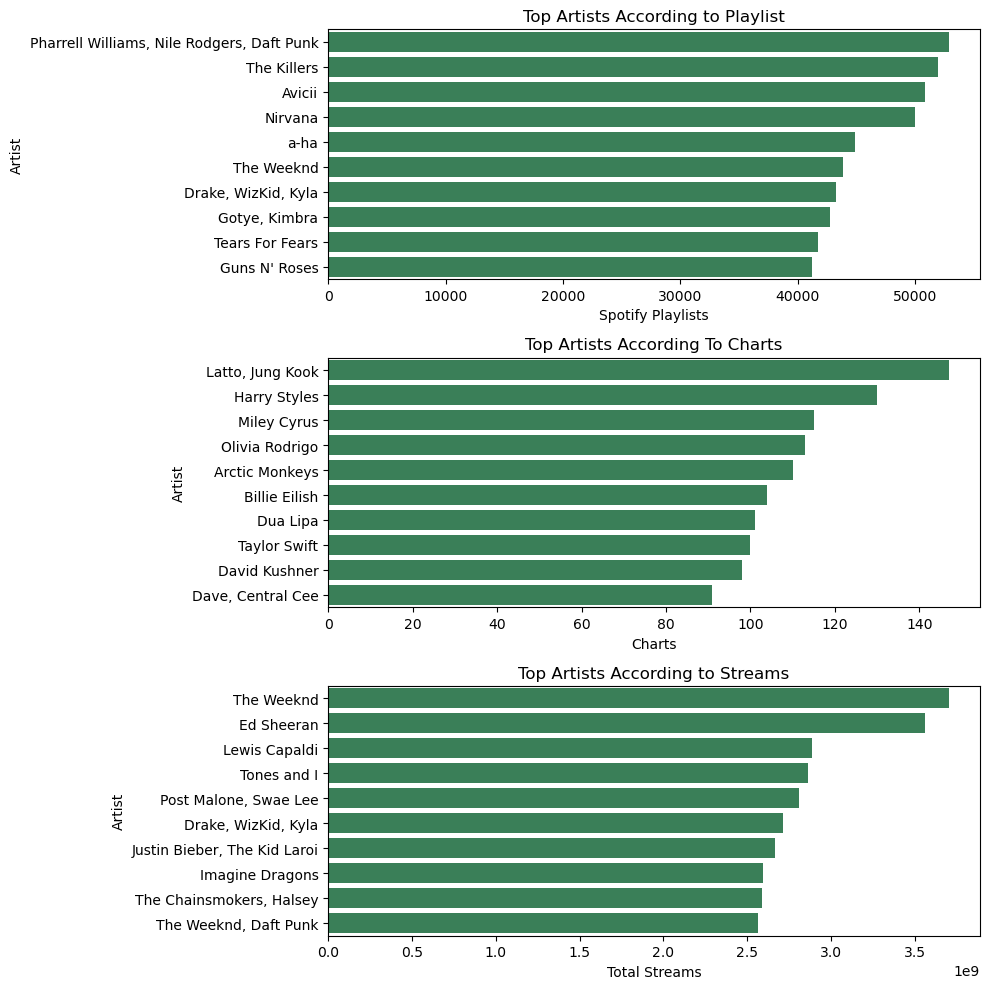

In [30]:
play = df.sort_values(by='in_spotify_playlists', ascending=False)
play = play[['artist(s)_name', 'in_spotify_playlists']][:10]

chart = df.sort_values(by='in_spotify_charts', ascending=False)
chart = chart[['artist(s)_name', 'in_spotify_charts']][:10]

stream = df.sort_values(by='streams', ascending=False)
stream = stream[['artist(s)_name', 'streams']][:10]

fig, axes = plt.subplots(3,1,figsize=(10,10))
plt.subplot(3,1,1)
ax1 = sns.barplot(play, y='artist(s)_name', x='in_spotify_playlists', color = 'seagreen')
ax1.set_xlabel('Spotify Playlists')
ax1.set_ylabel('Artist')
ax1.set_title('Top Artists According to Playlist')

plt.subplot(3,1,2)
ax1 = sns.barplot(chart, y='artist(s)_name', x='in_spotify_charts', color = 'seagreen')
ax1.set_xlabel('Charts')
ax1.set_ylabel('Artist')
ax1.set_title('Top Artists According To Charts')


plt.subplot(3,1,3)
ax1 = sns.barplot(stream, y='artist(s)_name', x='streams', color = 'seagreen')
ax1.set_xlabel('Total Streams')
ax1.set_ylabel('Artist')
ax1.set_title('Top Artists According to Streams')

plt.tight_layout()
plt.show()

### Топ песен

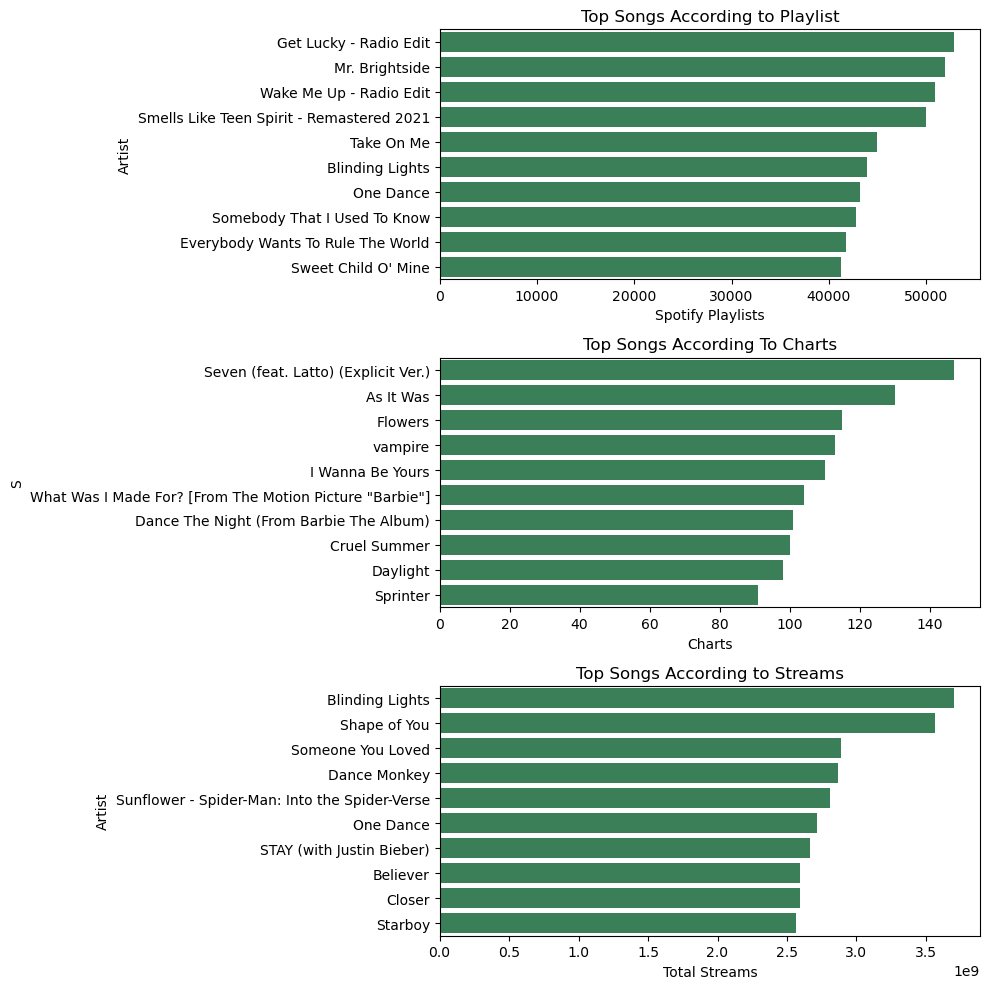

In [31]:
play = df.sort_values(by='in_spotify_playlists', ascending=False)
play = play[['track_name', 'in_spotify_playlists']][:10]

chart = df.sort_values(by='in_spotify_charts', ascending=False)
chart = chart[['track_name', 'in_spotify_charts']][:10]

stream = df.sort_values(by='streams', ascending=False)
stream = stream[['track_name', 'streams']][:10]

fig, axes = plt.subplots(3,1,figsize=(10,10))
plt.subplot(3,1,1)
ax1 = sns.barplot(play, y='track_name', x='in_spotify_playlists', color = 'seagreen')
ax1.set_xlabel('Spotify Playlists')
ax1.set_ylabel('Artist')
ax1.set_title('Top Songs According to Playlist')

plt.subplot(3,1,2)
ax1 = sns.barplot(chart, y='track_name', x='in_spotify_charts', color = 'seagreen')
ax1.set_xlabel('Charts')
ax1.set_ylabel('S')
ax1.set_title('Top Songs According To Charts')


plt.subplot(3,1,3)
ax1 = sns.barplot(stream, y='track_name', x='streams', color = 'seagreen')
ax1.set_xlabel('Total Streams')
ax1.set_ylabel('Artist')
ax1.set_title('Top Songs According to Streams')

plt.tight_layout()
plt.show()

### Количество песен по годам, месяцу, дням

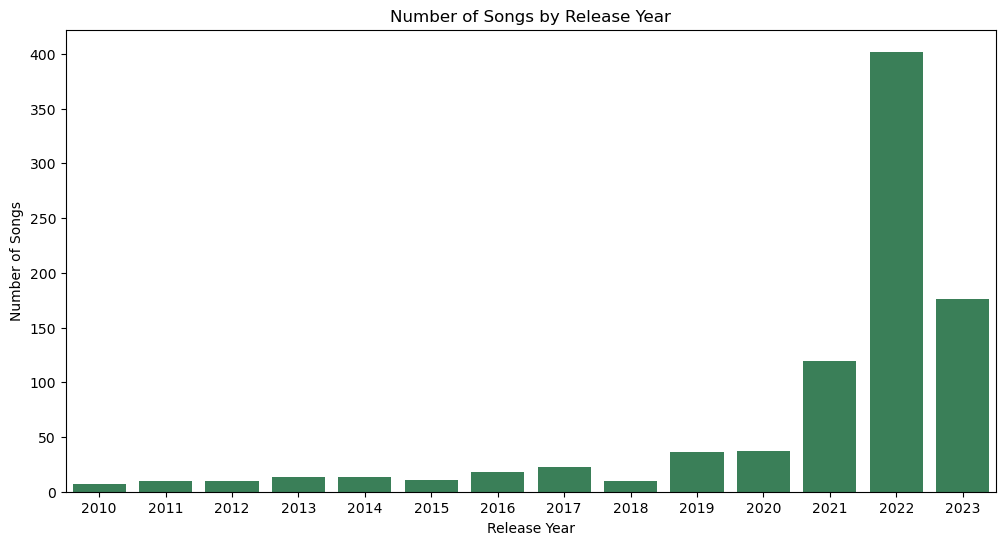

In [32]:
songs_by_year = df['released_year'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=songs_by_year.head(14), color = 'seagreen')
plt.title('Number of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()

Здесь интересно то, что большинство самых прослушиваемых композиций выпущены в 2022 году. Я предполагаю это явление обосновывается ковидным периодом: у артистов было больше времени на запись песен и, что важнее, альбомов, в течение 2019-2021 года. В 2022 большинство ограничений спало, то есть у артистов появилась возможность выезжать в туры вместе с новоопубликованными альбомами.

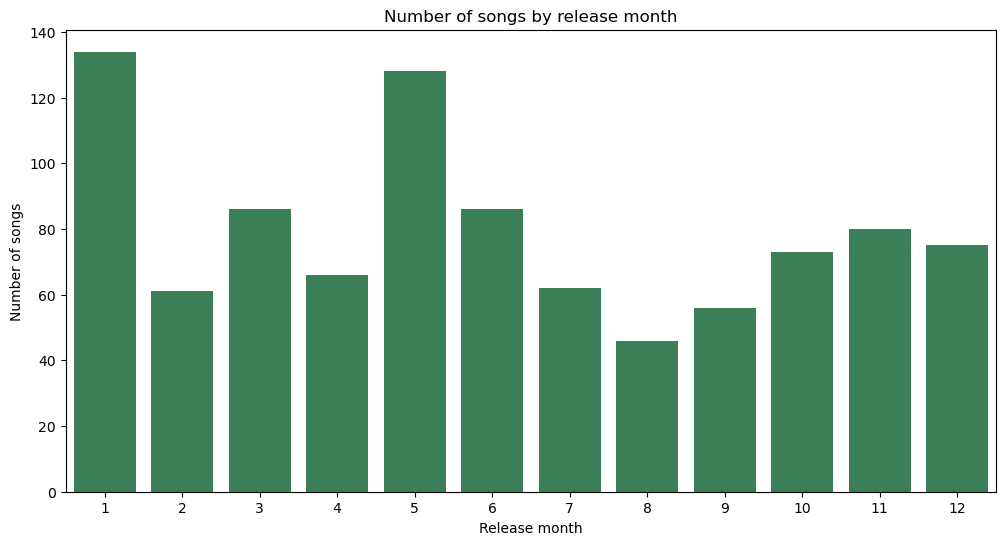

In [33]:
songs_by_year = df['released_month'].value_counts().reset_index()
songs_by_year.columns = ['released_month', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='released_month', y='count', data=songs_by_year.head(14), color = 'seagreen')
plt.title('Number of songs by release month')
plt.xlabel('Release month')
plt.ylabel('Number of songs')
plt.show()

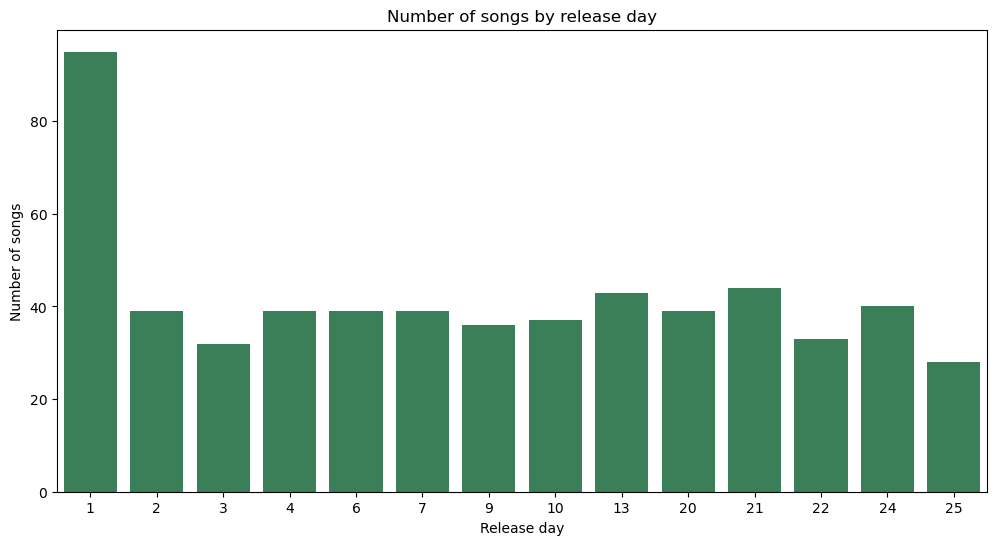

In [34]:
songs_by_year = df['released_day'].value_counts().reset_index()
songs_by_year.columns = ['released_day', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='released_day', y='count', data=songs_by_year.head(14), color = 'seagreen')
plt.title('Number of songs by release day')
plt.xlabel('Release day')
plt.ylabel('Number of songs')
plt.show()

Исходя из двух графиков выше, можно заключить, что большинство популярных песен выходит в начале месяца либо в январе, либо в середине лета.

### Самые старые песни

In [35]:
df[df.released_year<1960][['released_year', 'artist(s)_name', 'track_name']].reset_index(drop=True).sort_values(by='released_year')

,released_year,artist(s)_name,track_name
0,1930,"Styrx, utku INC, Thezth",Agudo Magico 3
7,1942,"Bing Crosby, John Scott Trotter & His Orchestr...",White Christmas
5,1946,Nat King Cole,The Christmas Song (Merry Christmas To You) - ...
6,1950,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow!
4,1952,Burl Ives,A Holly Jolly Christmas - Single Version
2,1957,Bobby Helms,Jingle Bell Rock
11,1957,Frank Sinatra,Jingle Bells - Remastered 1999
1,1958,Brenda Lee,Rockin' Around The Christmas Tree
8,1958,"Perry Como, The Fontane Sisters, Mitchell Ayre...",It's Beginning to Look a Lot Like Christmas (w...
10,1958,Chuck Berry,Run Rudolph Run - Single Version


Примечательным является то, что практически все наиболее старые популярные песни на сервисе являются новогодними хитами.

### Песни с наибольшим числом артистов

In [36]:
df.sort_values(by='artist_count', ascending=False).head(13)[['track_name',  'artist(s)_name', 'artist_count']].reset_index(drop=True)

,track_name,artist(s)_name,artist_count
0,Se Le Ve,"Arcangel, De La Ghetto, Justin Quiles, Lenny T...",8
1,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8
2,"Cay�� La Noche (feat. Cruz Cafun��, Abhir Hath...","Quevedo, La Pantera, Juseph, Cruz Cafun��, B��...",7
3,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7
4,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6
5,"Nobody Like U - From ""Turning Red""","Jordan Fisher, Josh Levi, Finneas O'Connell, 4...",6
6,"Besharam Rang (From ""Pathaan"")","Vishal-Shekhar, Shilpa Rao, Caralisa Monteiro,...",6
7,ULTRA SOLO REMIX,"De La Ghetto, Feid, Polima WestCoast, Paloma M...",5
8,Marisola - Remix,"Duki, NICKI NICOLE, Cris Mj, Standly, Stars Mu...",5
9,"Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)","Kodak Black, NLE Choppa, Muni Long, JVKE, Jimin",5


Здесь же можно заметить, что большое число артистов характерно для саундтрека к мультфильму и танцевального реггетона.

### Самые прослушиваемые песни за каждый год

In [37]:
release_years = df.released_year.unique()
indexes = []

for i in release_years:
    indexes.append(df[df.released_year == i].streams.idxmax())
    
most_streamed_each_year = df[['track_name', 'released_year', 'streams']].loc[indexes]

fig = px.bar(data_frame=most_streamed_each_year, x='released_year', y='streams', color='track_name', height = 600)

fig.update_layout(title='Most Streamed Song for Each Year',
                  xaxis_title='Year',
                  yaxis_title='Number of Streams (Billions)')

fig.show()

### Частые слова в названиях

In [38]:
block_list = ['Remix', 'Feat.', 'Taylors', 'Version', 'Feat', 'feat', 'Remastered', 'Bts', 'Vol', 'Spiderverse', 'Soundtrack', 'Music', 'Edit']
track_names = ' '.join(df.track_name)
track_names = ''.join([char if char in string.ascii_letters + ' ' else '' for char in track_names])
words_list = track_names.split()
track_names = ' '.join([word for word in words_list if word not in block_list])

Text(0.0, 1.0, 'Common words in song titles')

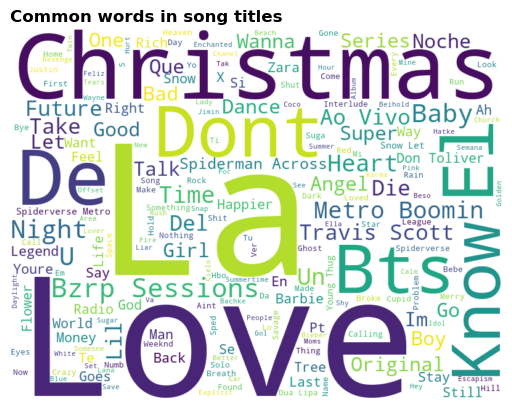

In [39]:
word_cloud = WordCloud(background_color="white", max_words=200, width=800, height=600)

word_cloud.generate(track_names.title())

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.gca().set_title('Common words in song titles', loc='left', weight='bold')

### Количество артистов в песне

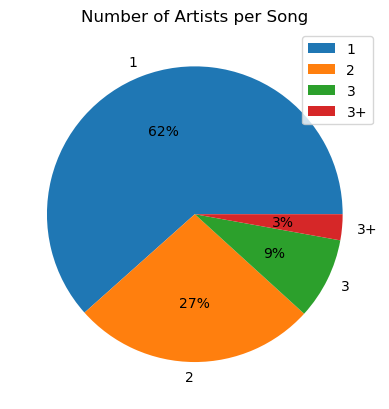

In [40]:
artist_count = df['artist_count'].value_counts()
data = [artist_count.iloc[0], artist_count.iloc[1], artist_count.iloc[2], sum(artist_count.iloc[3:])]
labels = ['1', '2', '3', '3+']

plt.pie(data, labels=labels, autopct='%.0f%%')
plt.legend()
plt.title('Number of Artists per Song')
plt.show() 

### Годовые тренды

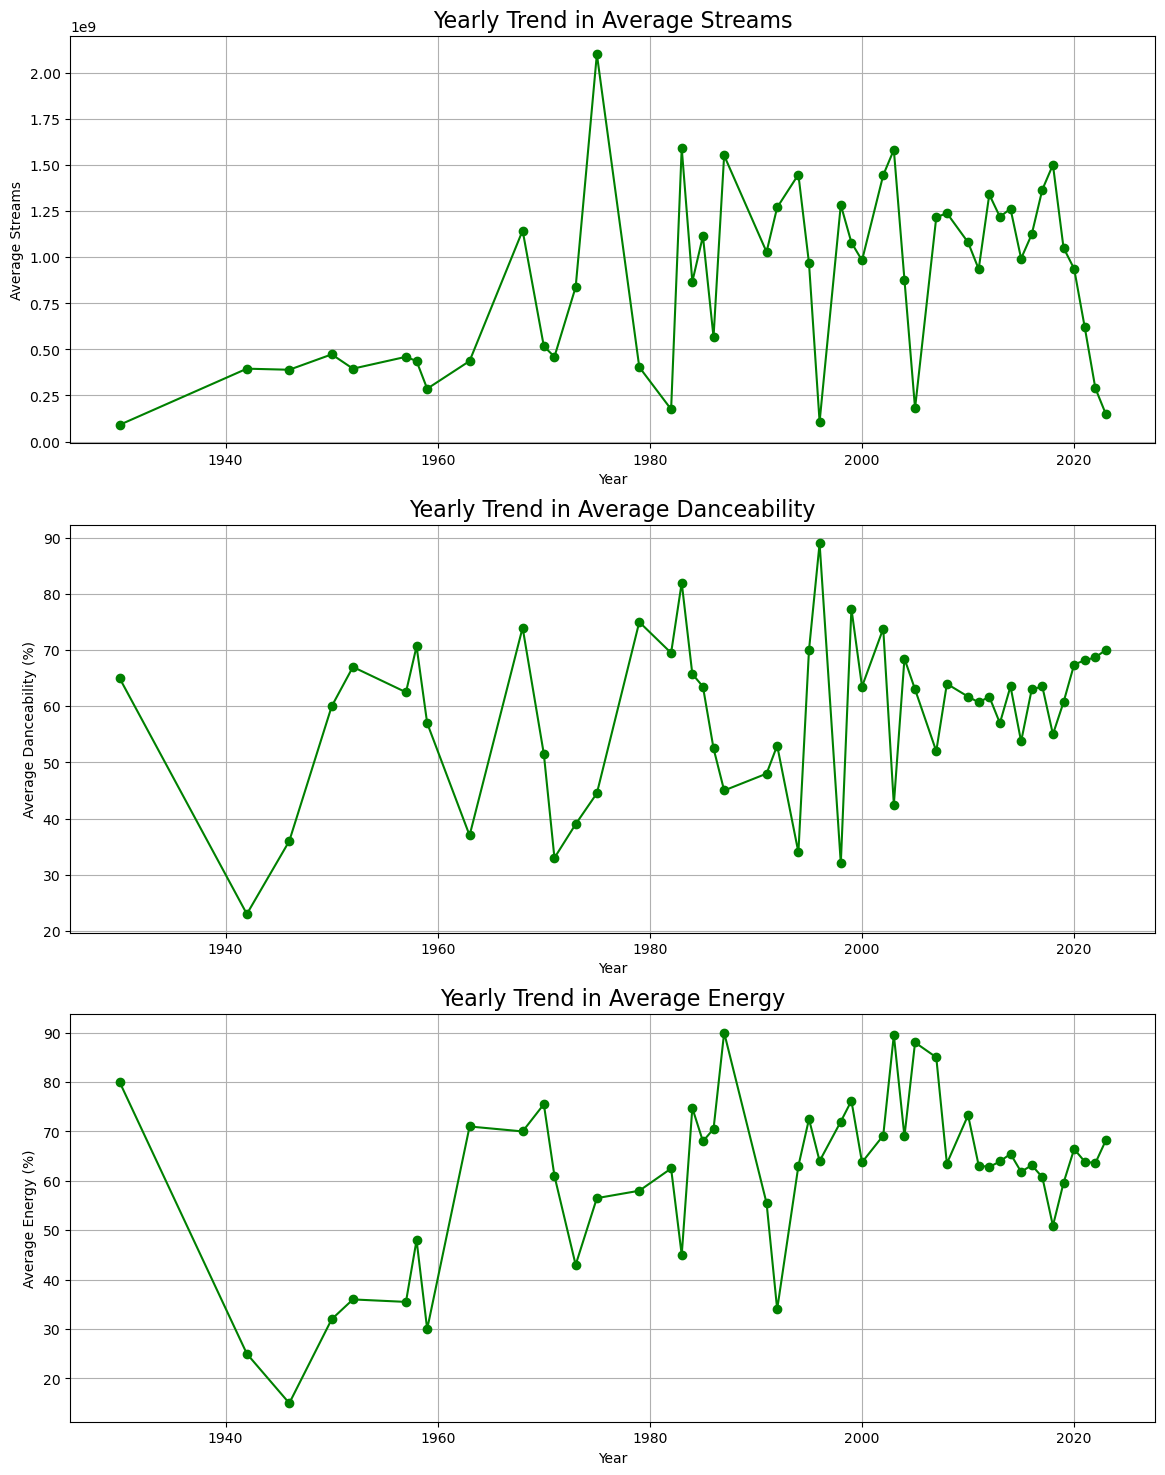

In [41]:
yearly_averages = df.groupby(df['released_year'])[['streams', 'danceability_%', 'energy_%']].mean()

fig, axes = plt.subplots(nrows=3, figsize=(14, 18))

axes[0].plot(yearly_averages.index, yearly_averages['streams'], marker='o', color='green')
axes[0].set_title('Yearly Trend in Average Streams', fontsize=16)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Streams')
axes[0].grid(True)

axes[1].plot(yearly_averages.index, yearly_averages['danceability_%'], marker='o', color='green')
axes[1].set_title('Yearly Trend in Average Danceability', fontsize=16)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Danceability (%)')
axes[1].grid(True)

axes[2].plot(yearly_averages.index, yearly_averages['energy_%'], marker='o', color='green')
axes[2].set_title('Yearly Trend in Average Energy', fontsize=16)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Energy (%)')
axes[2].grid(True)

plt.show()

Несмотря на то, что большинство песен было выпущено в 2022 году, их среднее количество прослушиваний гораздо ниже, в сравнении с более ранними произведениями. Скорее всего это обосновывается тем, что такие композиции становятся популярными лишь по веянию трендов, в то время как старые песни получают прослушивания за счет узнаваемости и культового статуста.